In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

#Standarization(Z-Score Scaling)

In [4]:
df=pd.DataFrame({'h': [150,160,170,180,190],
                 'w': [50,60,70,80,90]
                 })

In [5]:
m=df.mean()
s=df.std()
z=(df-m)/s
print(z)

          h         w
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911


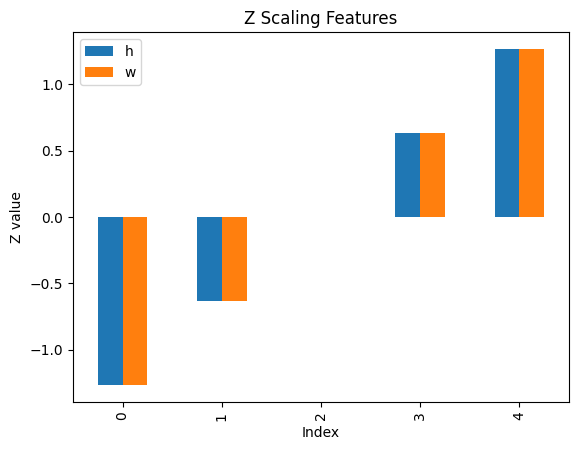

In [7]:
z.plot(kind='bar')
plt.title("Z Scaling Features")
plt.xlabel("Index")
plt.ylabel("Z value")
plt.show()

#MIN-MAX Scaling


In [8]:
df = pd.DataFrame({'h':[150,175,170,180,190],
                   'w':[50,60,70,180,90]})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,180
4,190,90


In [11]:
mn=df.min()
mx=df.max()
r=mx-mn
x=(df-mn)/r
print(x.round(2))

      h     w
0  0.00  0.00
1  0.62  0.08
2  0.50  0.15
3  0.75  1.00
4  1.00  0.31


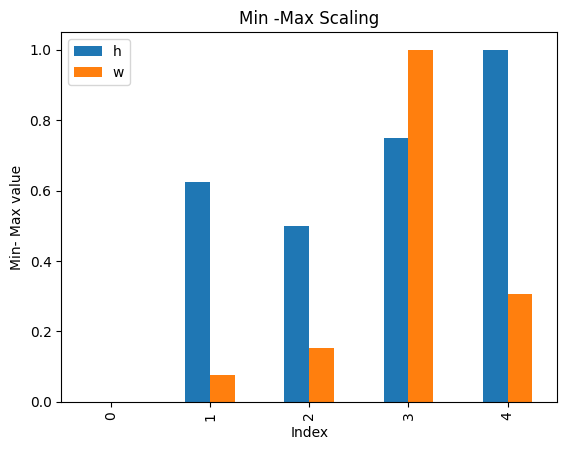

In [13]:
x.plot(kind='bar')
plt.title("Min -Max Scaling")
plt.xlabel("Index")
plt.ylabel("Min- Max value")
plt.show()

#Robust Scalling

In [14]:
df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [18]:
md=df.median()
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

md,q1,q3,iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [19]:
r=(df-md)/iqr
print(r)

     h    w
0 -1.0 -1.0
1 -0.5 -0.5
2  0.0  0.0
3  0.5  0.5
4  6.5  6.5


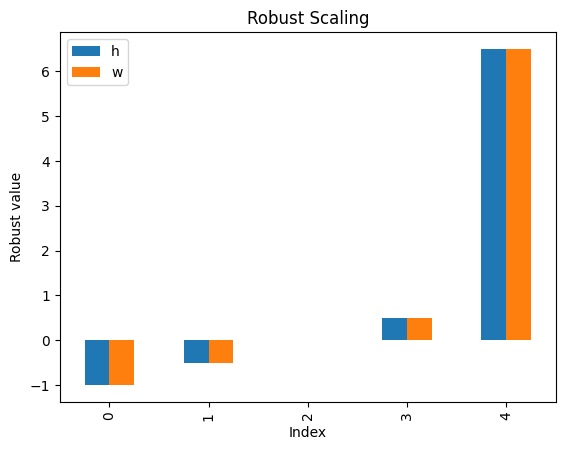

In [20]:
r.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index")
plt.ylabel("Robust value")
plt.show()

In [22]:
# standardization/z score
m = df.mean()
s = df.std()
z = (df - m) / s

# min max
mn = df.min()
mx = df.max()
mm = (df - mn) / (mx - mn)

# side-by-side
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 r.add_prefix('rb_')], axis=1)
out.round(2)

,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5


#One-Hot Encoding

In [24]:
df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [25]:
d_color=pd.get_dummies(df['color'],prefix='color',dtype=int)

In [29]:
df_encoded=pd.concat([df,d_color],axis=1)
df_encoded

,id,color,size,price,color_blue,color_green,color_red
0,1,red,Small,10,0,0,1
1,2,blue,Medium,12,1,0,0
2,3,green,Large,15,0,1,0
3,4,red,Medium,11,0,0,1


In [30]:
df_encoded = df_encoded.drop("color", axis = 1)
print(df_encoded)

   id    size  price  color_blue  color_green  color_red
0   1   Small     10           0            0          1
1   2  Medium     12           1            0          0
2   3   Large     15           0            1          0
3   4  Medium     11           0            0          1


#Ordinal-Encoding

In [31]:

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [32]:
# Step 2: declare the ordinal order
order = {"Small":1,"Medium":2,"Large":3}

In [33]:
# Step 3: convert the whole feature
# df["size_encoded"]=df["size"].map(order).astype(int)
df["size"]=df["size"].map(order).astype(int)

In [35]:
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11


#Understanding Vectors, Dot Product, and Norms — A Hands-on Python Exploration

In [36]:
#Step 1: Creating Vectors
import numpy as np

# Two tiny 3D vectors
a = np.array([2, 1, 3])
b = np.array([1, 3, 3])
print(a)
print(b)

[2 1 3]
[1 3 3]


In [37]:
#Step 2: Vector Operations (Addition and Subtraction)
add_ab = a + b
sub_ab = a - b
print(add_ab)
print(sub_ab)

[3 4 6]
[ 1 -2  0]


In [38]:
#Step 3: Dot Product (Similarity of Direction)
# Manual dot product: sum of pairwise products
dot = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

dot_np = a@b # np.dot(a,b)
print(dot)
print(dot_np)

14
14


In [39]:
#Step 4: Norms (Length or Magnitude of a Vector)
# L2 norm, the usual length
l2_a = np.linalg.norm(a)
print(l2_a)
l1_a = np.linalg.norm(a, ord = 1)
print(l1_a)

3.7416573867739413
6.0


In [40]:
#Step 5: Normalizing a Vector (Unit Vector)
unit_a = a/np.linalg.norm(a)
len_unit_a = np.linalg.norm(unit_a)
print(unit_a)
print(len_unit_a)

[0.53452248 0.26726124 0.80178373]
1.0


#Euclidean and Manhattan Distance

In [42]:
import numpy as np

X = np.array([
    [70, 80],  # S1
    [60, 90],  # S2
    [85, 60],  # S3
    [78, 76],  # S4
    [62, 65],  # S5
], dtype=float)

q = np.array([75, 70], dtype=float)

print("X shape:", X.shape)
print("q:", q.tolist())

X shape: (5, 2)
q: [75.0, 70.0]


In [43]:
# Euclidean distances (L2)
eu = np.linalg.norm(X - q, axis=1)
print("Euclidean:", np.round(eu, 3).tolist())

Euclidean: [11.18, 25.0, 14.142, 6.708, 13.928]


In [44]:
# Manhattan distances (L1)
ma = np.linalg.norm(X - q, ord=1, axis=1)
print("Manhattan:", ma.tolist())

Manhattan: [15.0, 35.0, 20.0, 9.0, 18.0]


#QUIZ EXPLAINATION

https://docs.google.com/document/d/1EWkbv6d7ryVfqmW_94Mdmkn7A788lTL1RX4SnaGYq4o/edit?tab=t.0

#EXTRA PRACTICE

https://docs.google.com/document/d/1i_RdiQyERSe_1jvptsvjiA6-iO98qjg6jMnIxjbSMGI/edit?tab=t.0#heading=h.knk6nfl9tn68

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Given data
weights = np.array([58, 62, 65, 66, 190]).reshape(-1, 1)
heights = np.array([150, 160, 170, 175, 180]).reshape(-1, 1)

df = pd.DataFrame({
    "Weight_kg": weights.flatten(),
    "Height_cm": heights.flatten()
})

print("Original Data:")
print(df, "\n")

# ===== (a) Standardization manually for first 3 values using NumPy =====
first_three_weights = weights[:3]
first_three_heights = heights[:3]

mean_w = np.mean(first_three_weights)
std_w = np.std(first_three_weights)

mean_h = np.mean(first_three_heights)
std_h = np.std(first_three_heights)

z_w = (first_three_weights - mean_w) / std_w
z_h = (first_three_heights - mean_h) / std_h

print("===== (a) Standardization (First 3 values only) =====")
print("Weight Z-scores:", np.round(z_w.flatten(), 4))
print("Height Z-scores:", np.round(z_h.flatten(), 4), "\n")

# ===== (b) Min-Max Scaling using sklearn =====
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df)

print("===== (b) Min-Max Scaling =====")
print(pd.DataFrame(minmax_scaled, columns=["Weight_Scaled", "Height_Scaled"]), "\n")

# ===== (c) Robust Scaling (Weight only) =====
robust_scaler = RobustScaler()
robust_scaled_weight = robust_scaler.fit_transform(weights)

print("===== (c) Robust Scaling (Weight) =====")
print(np.round(robust_scaled_weight.flatten(), 4), "\n")

# ===== (d) Conclusion =====
print("===== (d) Conclusion =====")
print("Robust Scaling handles outliers best because it uses Median and IQR,")
print("which are not influenced by extreme values.\n")


Original Data:
   Weight_kg  Height_cm
0         58        150
1         62        160
2         65        170
3         66        175
4        190        180 

===== (a) Standardization (First 3 values only) =====
Weight Z-scores: [-1.2787  0.1162  1.1625]
Height Z-scores: [-1.2247  0.      1.2247] 

===== (b) Min-Max Scaling =====
   Weight_Scaled  Height_Scaled
0       0.000000       0.000000
1       0.030303       0.333333
2       0.053030       0.666667
3       0.060606       0.833333
4       1.000000       1.000000 

===== (c) Robust Scaling (Weight) =====
[-1.75 -0.75  0.    0.25 31.25] 

===== (d) Conclusion =====
Robust Scaling handles outliers best because it uses Median and IQR,
which are not influenced by extreme values.



In [46]:
import numpy as np

# ===============================
# Raw feature data
# ===============================
monthly_income = np.array([15000, 22000, 30000, 40000, 900000])
room_temp = np.array([18, 20, 25, 30])
transaction_count = np.array([0, 0, 0, 2, 3, 10])

print("Original Data:")
print("Income:", monthly_income)
print("Temperature:", room_temp)
print("Transactions:", transaction_count, "\n")


# ===============================
# Helper functions
# ===============================
def median_iqr(arr):
    sorted_arr = np.sort(arr)
    median = np.median(sorted_arr)
    q1 = np.percentile(sorted_arr, 25)
    q3 = np.percentile(sorted_arr, 75)
    iqr = q3 - q1
    return median, iqr

def robust_scale(arr):
    median, iqr = median_iqr(arr)
    return (arr - median) / iqr

def min_max_scale(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def standardize(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std


# ===============================
# Apply chosen scalers
# ===============================

# 1️⃣ Monthly Income → Robust Scaling
income_scaled = robust_scale(monthly_income)

# 2️⃣ Room Temperature → Min-Max Scaling
temp_scaled = min_max_scale(room_temp)

# 3️⃣ Transaction Count → Standardization
txn_scaled = standardize(transaction_count)


# ===============================
# Print Results
# ===============================
print("Scaled Values:")

print("Income (Robust):")
print(np.round(income_scaled, 4))

print("\nRoom Temp (Min–Max):")
print(np.round(temp_scaled, 4))

print("\nTransaction Count (Standardized):")
print(np.round(txn_scaled, 4))


Original Data:
Income: [ 15000  22000  30000  40000 900000]
Temperature: [18 20 25 30]
Transactions: [ 0  0  0  2  3 10] 

Scaled Values:
Income (Robust):
[-0.8333 -0.4444  0.      0.5556 48.3333]

Room Temp (Min–Max):
[0.     0.1667 0.5833 1.    ]

Transaction Count (Standardized):
[-0.7048 -0.7048 -0.7048 -0.141   0.141   2.1143]


In [47]:
import pandas as pd
import numpy as np

# Original dataset
data = {
    "ID": [1, 2, 3, 4],
    "City": ["Dhaka", "Chattogram", "Rajshahi", "Dhaka"],
    "Education_Level": ["High School", "Bachelor", "Master", "Bachelor"],
    "Satisfaction": ["Low", "Medium", "High", "Medium"]
}

df = pd.DataFrame(data)

# ----- One-hot Encoding for City -----
cities = np.unique(df["City"])
for city in cities:
    df[f"City_{city}"] = (df["City"] == city).astype(int)

# ----- Ordinal Encoding for Education_Level -----
education_map = {"High School": 0, "Bachelor": 1, "Master": 2}
df["Education_Level_Encoded"] = df["Education_Level"].map(education_map)

print(df)


   ID        City Education_Level Satisfaction  City_Chattogram  City_Dhaka  \
0   1       Dhaka     High School          Low                0           1   
1   2  Chattogram        Bachelor       Medium                1           0   
2   3    Rajshahi          Master         High                0           0   
3   4       Dhaka        Bachelor       Medium                0           1   

   City_Rajshahi  Education_Level_Encoded  
0              0                        0  
1              0                        1  
2              1                        2  
3              0                        1  


In [48]:
a = np.array([3,-1,2])
b = np.array([4,0,-2])

# Dot product
dot = np.dot(a,b)
# Norms
l1_norm = np.sum(np.abs(a))
l2_norm = np.linalg.norm(a)

print("Dot Product a·b:", dot)
print("L1 Norm of a:", l1_norm)
print("L2 Norm of a:", l2_norm)

Dot Product a·b: 8
L1 Norm of a: 6
L2 Norm of a: 3.7416573867739413


In [49]:
import numpy as np
import pandas as pd

# Points
points = {
    'ID': ['P1', 'P2', 'P3'],
    'x': [2, 5, 2],
    'y': [3, 7, 10]
}

df = pd.DataFrame(points)
print("Original Points:\n", df)

# Function to compute Euclidean distance
def euclidean(p1, p2):
    return np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)

# Function to compute Manhattan distance
def manhattan(p1, p2):
    return np.abs(p2[0]-p1[0]) + np.abs(p2[1]-p1[1])

# Compute distance matrices
euclidean_matrix = np.zeros((3,3))
manhattan_matrix = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        p1 = (df.loc[i, 'x'], df.loc[i, 'y'])
        p2 = (df.loc[j, 'x'], df.loc[j, 'y'])
        euclidean_matrix[i,j] = euclidean(p1, p2)
        manhattan_matrix[i,j] = manhattan(p1, p2)

# Display results
print("\nEuclidean Distance Matrix:\n", pd.DataFrame(euclidean_matrix, index=df['ID'], columns=df['ID']))
print("\nManhattan Distance Matrix:\n", pd.DataFrame(manhattan_matrix, index=df['ID'], columns=df['ID']))

# Scaling y by factor of 10
df_scaled = df.copy()
df_scaled['y'] = df_scaled['y'] * 10

# Compute distance between P1 and P2 after scaling
p1_scaled = (df_scaled.loc[0, 'x'], df_scaled.loc[0, 'y'])
p2_scaled = (df_scaled.loc[1, 'x'], df_scaled.loc[1, 'y'])

eu_scaled = euclidean(p1_scaled, p2_scaled)
man_scaled = manhattan(p1_scaled, p2_scaled)

print("\nAfter scaling y by 10:")
print(f"Euclidean distance P1-P2: {eu_scaled}")
print(f"Manhattan distance P1-P2: {man_scaled}")


Original Points:
    ID  x   y
0  P1  2   3
1  P2  5   7
2  P3  2  10

Euclidean Distance Matrix:
 ID   P1        P2        P3
ID                         
P1  0.0  5.000000  7.000000
P2  5.0  0.000000  4.242641
P3  7.0  4.242641  0.000000

Manhattan Distance Matrix:
 ID   P1   P2   P3
ID               
P1  0.0  7.0  7.0
P2  7.0  0.0  6.0
P3  7.0  6.0  0.0

After scaling y by 10:
Euclidean distance P1-P2: 40.11234224026316
Manhattan distance P1-P2: 43
